In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Part 1: The Logistic Map

Let $x_n\in[0,1]$ be the (normalised) population of some species at year $n$. Suppose the normalised population in year $n+1$ is given by $$x_{n+1}=rx_n(1-x_n)$$
with $0<r\leq 4$. It turns out that this simple looking model can generate very complicated behaviour.  We can begin to understand some of this behaviour using numerical simulations. 

We are interested in what happens for "typical" initial conditions, so we generate $x_0$ uniformly at random and then plot the time series $\{x_n\}_{n\in\mathbb{N}}$. We will investigate how the properties of this sequence vary with $r$. 

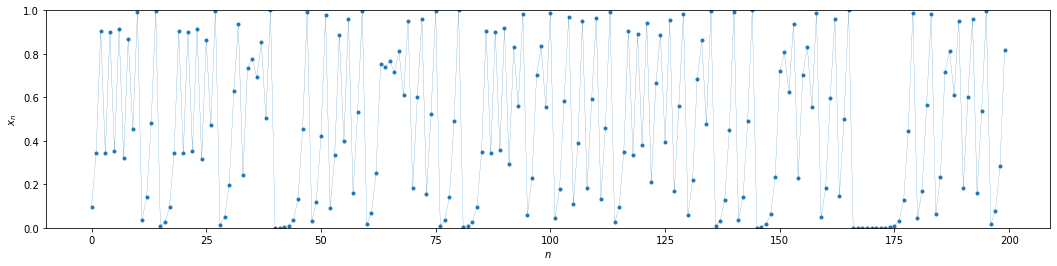

In [ ]:
N = 200 # number of time-steps
x = np.zeros(N); 
x[0] = np.random.uniform(0,1) # pick a random initial condition x_0$

r = 4 # choose r parameter

def f(r,x):
  return r*x*(1-x)

for i in range(N-1):
   x[i+1] = f(r,x[i]);

plt.figure(figsize=(18,4)) # make the figure long and thin
plt.plot(x, marker='.', linewidth=0.2);
plt.xlabel('$n$'); plt.ylabel('$x_n$'); plt.ylim([0,1]); 

Use the code above (and any extra code you think is useful) to explore the following questions. Some you can answer analytically and some you'll have to have to conjecture the  answer from the numerical simulations.

1.  For what $r$-values does the sequence $\{x_n\}_{n\in\mathbb{N}}$ converge? Can you analytically calculate what number it converges to? 
2. For what $r$-values is the typical long term behaviour periodic. Which length periods can you observe?
3. For what $r$-values is the typical long term behaviour aperiodic? Can you describe what seems to be happening as $r$ approaches one of these values?
4. Construct a diagram which plots $r$ against the set containing the long term behaviour of typical orbits.  Ask if it's not clear what this means. 

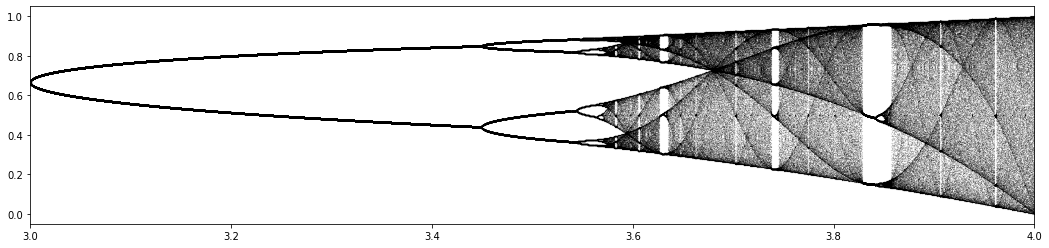

In [ ]:
# Qestion 1-3 discussion

# Question 4
plt.figure(figsize=(18,4))
K = 10000 
r = np.linspace(2.5 , 4, K)
x = np.random.uniform(0,1, size = K)
n = 1000
nf = 100
for i in range(n):
    x = f(r, x)
    # plot the final 100 positions
    if i > n - nf:
      plt.scatter(r, x, s= 0.001, color='black')
plt.xlim(2.5, 4);

## Ergodic Theory
There are also probabilistic questions we can ask about the logistic map


1.  For a typical $x_0$ write code to approximate the sequence of probability distributions $\rho_{n,x_0}$ on $[0,1]$ defined by
\begin{equation}
\rho_{n,x_0}(I) := \frac{1}{n}\sum_{k=0}^{n-1}\chi_I(x_k)
\end{equation}
where $\chi_I$ is the indicator function of an interval I. We can visualise these probability distributions by constructing them on a parition 
\begin{equation}
I_k = \left[ \frac{k}{K}, \frac{k+1}{K} \right] \text{ for } k=0,1,\dots K-1
\end{equation}
for large $K\in\mathbb{N}$. 
Does the sequence $\{\rho_{n,x_0}\}_{n\in\mathbb{N}}$ seem to converge as $n\rightarrow \infty$?
2. For $r=4$ compare your probability distribution with 
\begin{equation}
d\mu(x) = \frac{dx}{\pi\sqrt{x(1-x)}}
\end{equation} 
Later in the course we'll understand why this works!
3.   Calculate the quantity
\begin{equation}
\lambda(n,x_0) = \frac{1}{n} \sum_{k=0}^{n-1}\log\vert f'(x_k)\vert 
\end{equation}
Does $\lambda(n,x_0)$ seem to converge as $n\rightarrow\infty$ for a typical $x_0$? 
 Plot $\lim_{n\rightarrow\infty}\lambda(n,x_0)$ against $r$. What do you think this number might tell us?

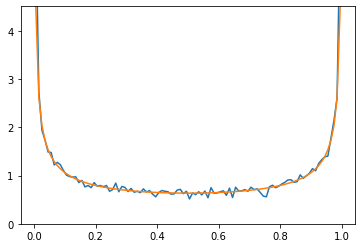

In [ ]:
# Questions 1 and 2
dx = 0.01
Ik = np.arange(0,1+dx, dx)
N = 20000
rho = np.zeros(len(Ik)-1)
x = np.zeros(N); x[0] = np.random.uniform()
r = 4

for i in range(N-1):
  x[i+1] = f(r,x[i])
  for j in range(len(Ik)-1):
    if Ik[j] < x[i] < Ik[j+1]:
      rho[j] = rho[j] + 1

rho = rho/(N*dx)

mid_I = (Ik[1:]+Ik[:-1])/2 # plot on the mid-points of the partition
plt.plot(mid_I, rho);

if r==4:
  mu = 1/(np.pi*np.sqrt(mid_I*(1-mid_I)))
  plt.plot(mid_I, mu);
  plt.ylim([0,np.max(mu)]);

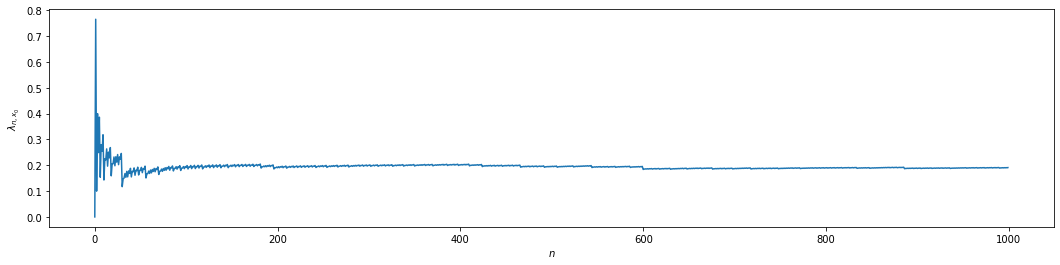

In [ ]:
# Question 3

# Investigating convergence
N = 1000
lam = np.zeros(N)
x = np.zeros(N); x[0] = np.random.uniform()
sum = 0
r = 3.6

for i in range(N-1): 
  x[i+1] = f(r,x[i])
  sum =  sum + np.log(np.abs(r*(1-2*x[i+1])))
  lam[i+1] = sum/(i+1)

plt.figure(figsize=(18,4))
plt.plot(lam);
plt.xlabel('$n$'); plt.ylabel('$\lambda_{n,x_0}$');

<Figure size 432x288 with 0 Axes>

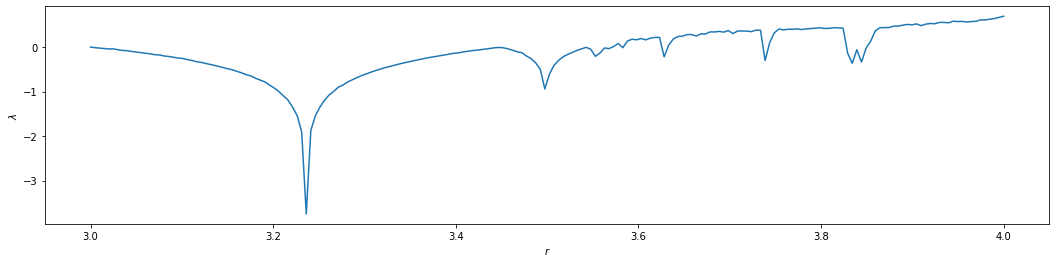

In [ ]:
# Further question 3: Plotting lambda against r
N = 1000
K = 200
x = np.zeros(N); x[0] = np.random.uniform()
sum = 0
r = np.linspace(3,4, num=K)
lam = np.zeros(K)

for k in range(K):
  x = np.random.uniform()
  sum = 0
  for i in range(N-1): 
    x = f(r[k],x)
    sum =  sum + np.log(np.abs(r[k]*(1-2*x)))
  lam[k] = sum/N

plt.figure()
plt.figure(figsize=(18,4))
plt.plot(r, lam);
plt.xlabel('$r$'); plt.ylabel('$\lambda$');